In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv('./train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

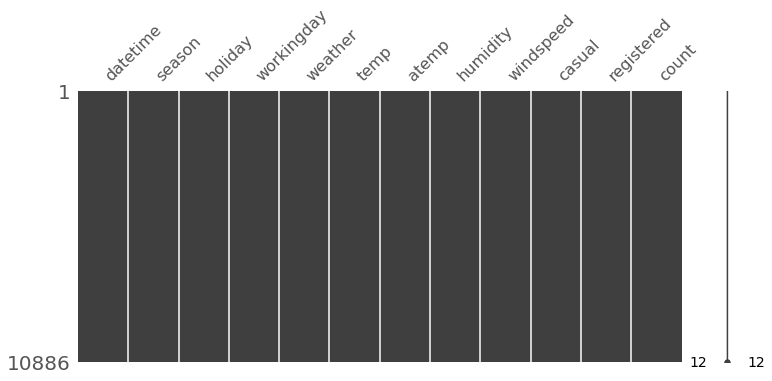

In [7]:
import missingno as msno

msno.matrix(train, figsize=(12,5))

In [8]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.shape

(10886, 18)

In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


<AxesSubplot:xlabel='second', ylabel='count'>

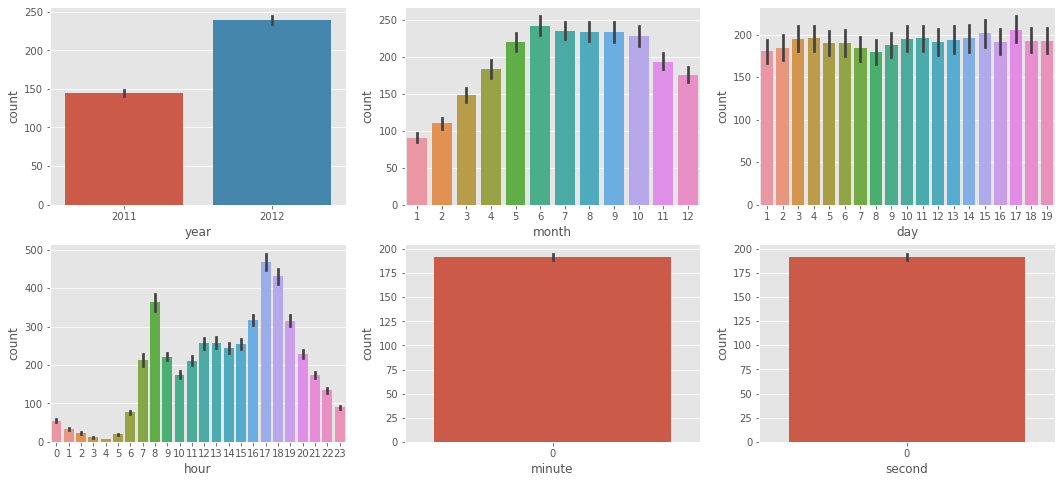

In [10]:
# 분, 초는 모두 0이라 쓸수 없는 데이터
#day는 19까지만 나와있어서 feature로 사용 불가능

f, ax = plt.subplots(2,3, figsize=(18,8))

sns.barplot('year', 'count', data=train, ax=ax[0][0])
sns.barplot('month', 'count', data=train, ax=ax[0][1])
sns.barplot('day', 'count', data=train, ax=ax[0][2])
sns.barplot('hour', 'count', data=train, ax=ax[1][0])
sns.barplot('minute', 'count', data=train, ax=ax[1][1])
sns.barplot('second', 'count', data=train, ax=ax[1][2])

Text(0.5, 1.0, 'workingday count')

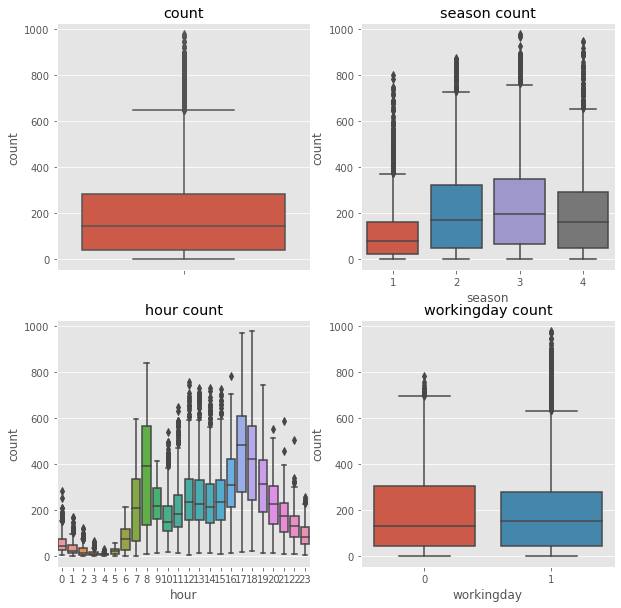

In [11]:
f, ax = plt.subplots(2,2, figsize=(10,10))
# orient = "v" -> 세로로 봄
# sns의 y는 그래프의 y label임
sns.boxplot(y='count', data=train,orient='v', ax = ax[0][0])
sns.boxplot('season', 'count', data=train,orient='v', ax = ax[0][1])
sns.boxplot('hour', 'count', data=train,orient='v', ax = ax[1][0])
sns.boxplot('workingday', 'count', data=train,orient='v', ax = ax[1][1])

ax[0][0].set_title('count')
ax[0][0].set_label('c')
ax[0][1].set_title('season count')
ax[1][0].set_title('hour count')
ax[1][1].set_title('workingday count')

In [12]:
#월요일 = 0, 일요일 = 6 인 요일.
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [13]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [14]:
train.dayofweek.value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

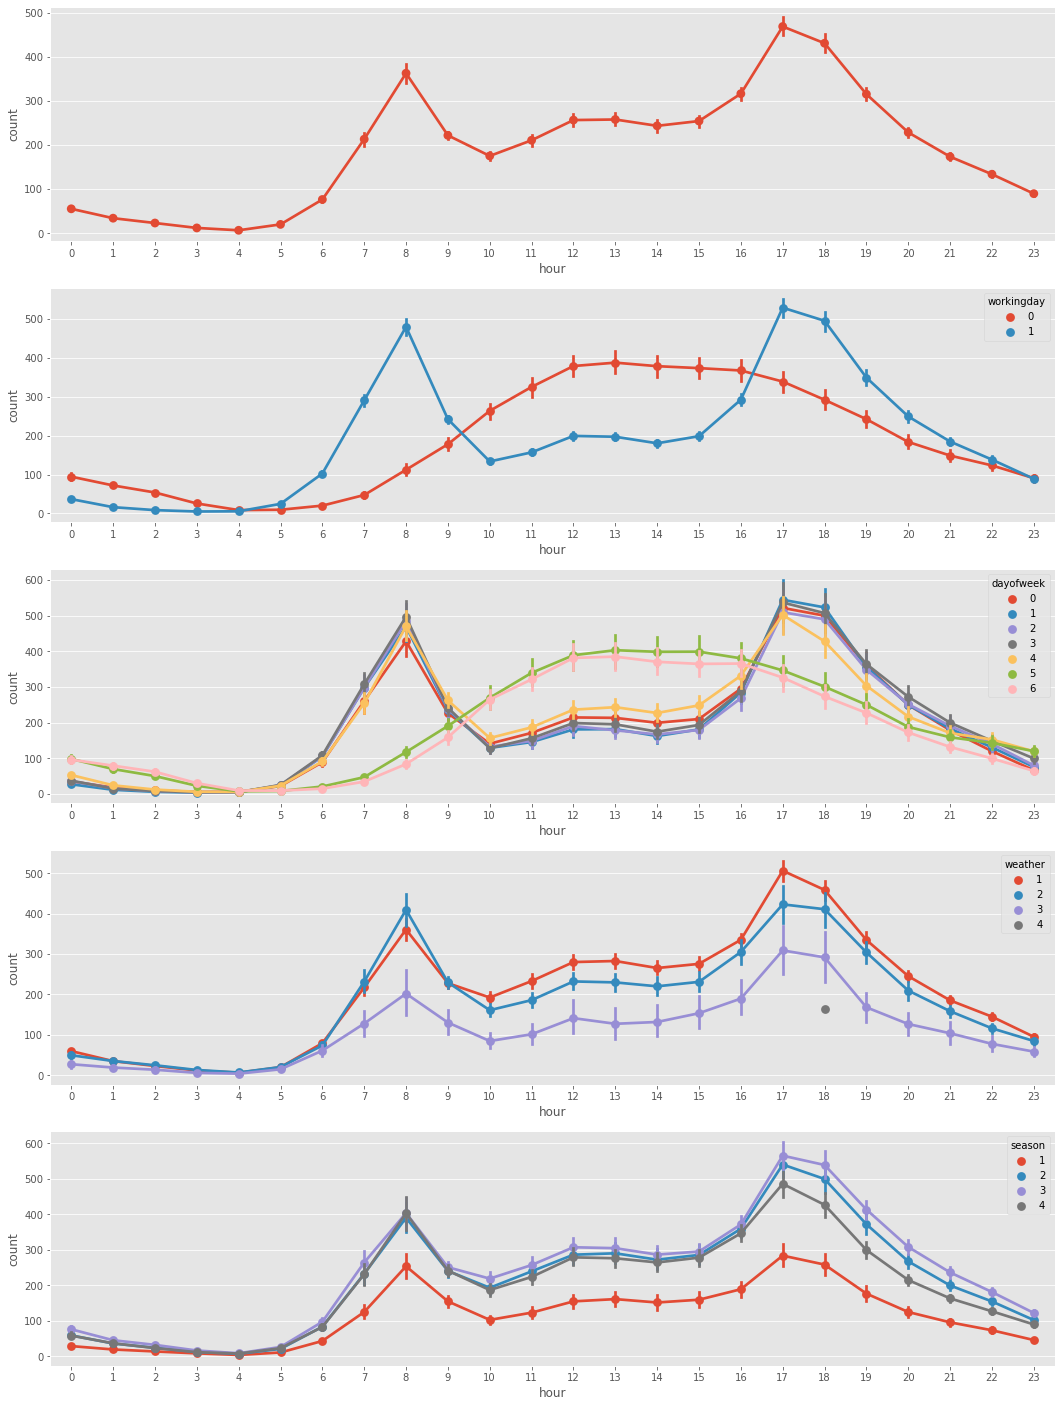

In [15]:
f, ax = plt.subplots(5, figsize=(18,25))
sns.pointplot('hour', 'count', data=train, ax=ax[0])
sns.pointplot('hour', 'count', data=train, hue='workingday',ax=ax[1])
sns.pointplot('hour', 'count', data=train, hue='dayofweek',ax=ax[2])
sns.pointplot('hour', 'count', data=train, hue='weather',ax=ax[3])
sns.pointplot('hour', 'count', data=train, hue='season',ax=ax[4])

In [16]:
corrMat = train[['temp','atemp','casual','registered','humidity','windspeed','count']]
corrMat = corrMat.corr()
print(corrMat)

mask = np.array(corrMat)
mask[np.tril_indices_from(mask)]=False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


<AxesSubplot:>

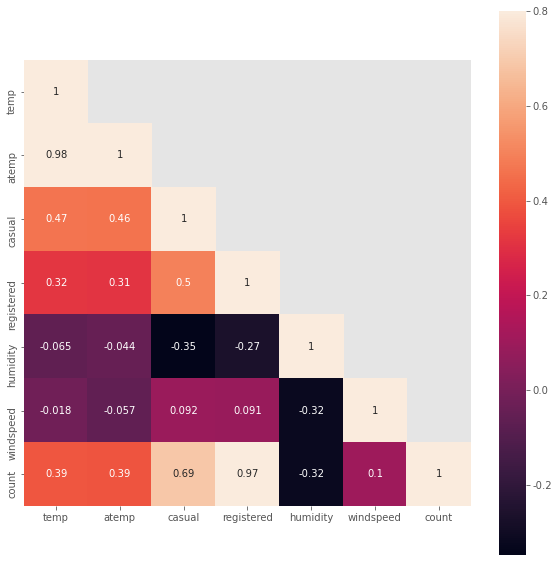

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(corrMat, mask=mask, vmax=.8,square=True, annot=True)

<AxesSubplot:xlabel='humidity', ylabel='count'>

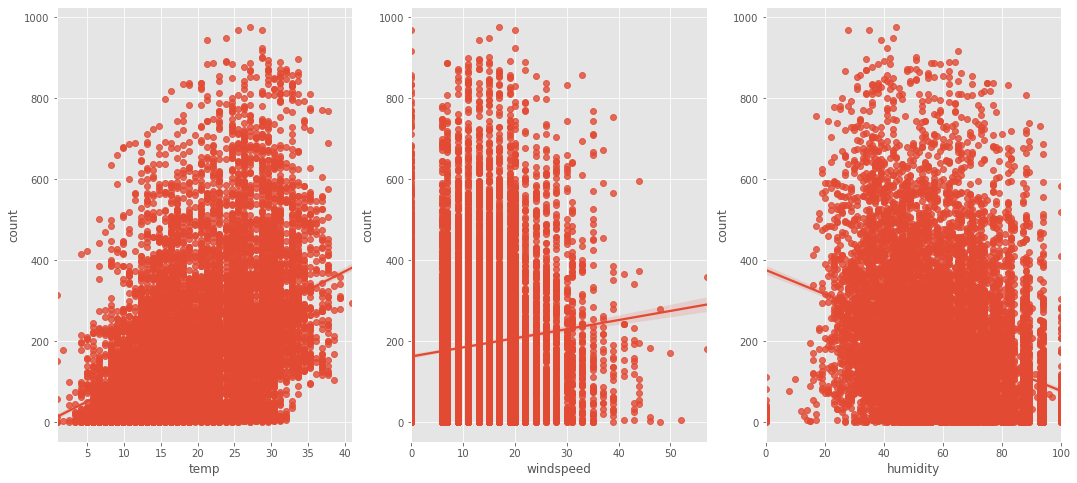

In [18]:
f, ax = plt.subplots(1,3,figsize=(18,8))
sns.regplot('temp','count',data=train,ax=ax[0])
sns.regplot('windspeed','count',data=train,ax=ax[1])
sns.regplot('humidity','count',data=train,ax=ax[2])

#풍속의 경우 0에 숫자가 몰림

In [19]:
def concatenate_year_month(datetime):
    return '{0}-{1}'.format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)
print(train.shape)
train[['datetime','year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<AxesSubplot:xlabel='year_month', ylabel='count'>

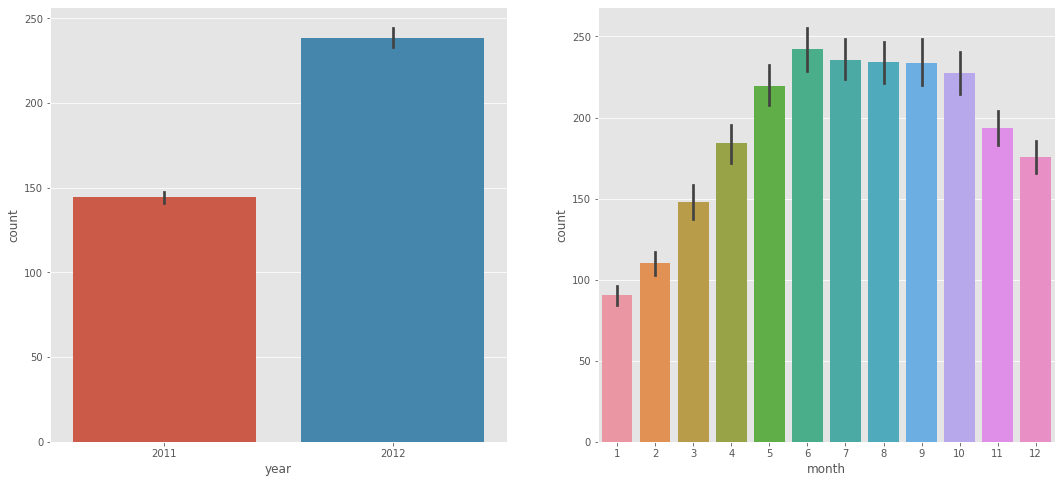

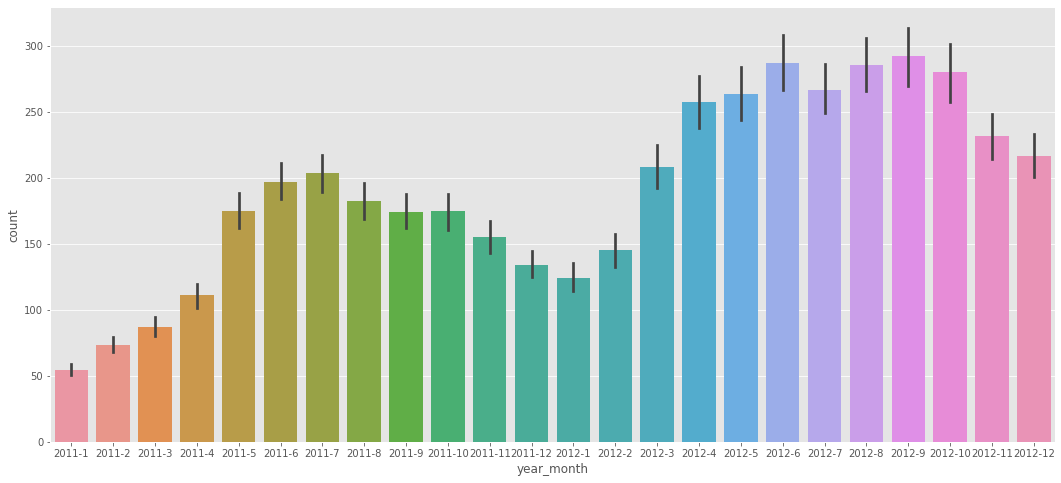

In [20]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.barplot('year','count',data=train,ax=ax[0])
sns.barplot('month','count',data=train,ax=ax[1])

f,ax = plt.subplots(figsize=(18,8))
sns.barplot('year_month','count', data=train,ax=ax)

In [21]:
trainWithoutOutliers = train[np.abs(train['count'] - train['count'].mean()) <= (3*train["count"].std())]
print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

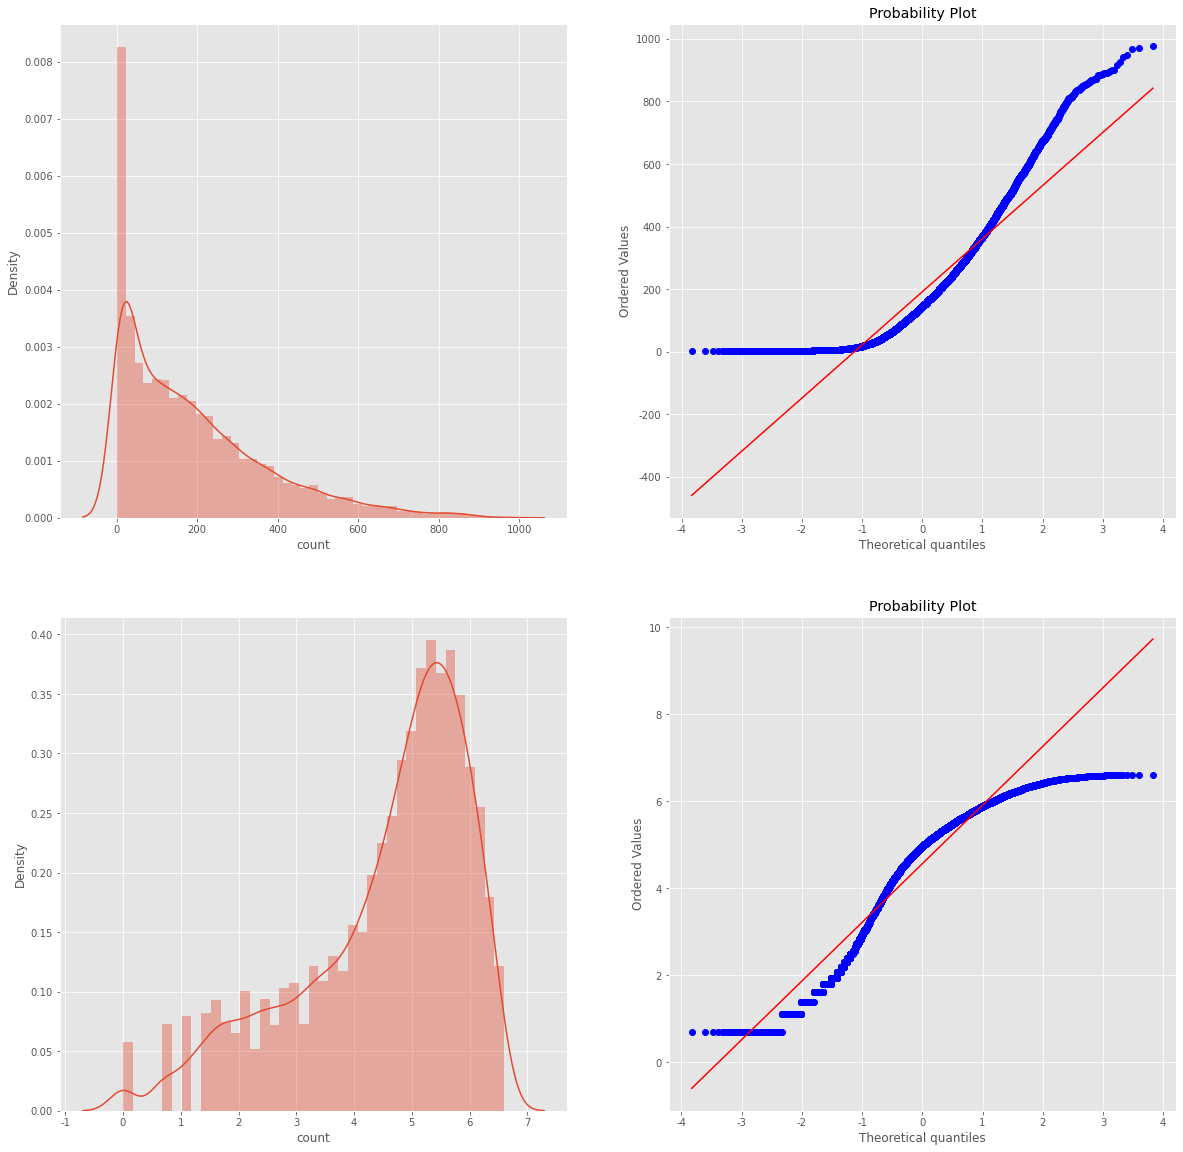

In [22]:
#기계학습에서는 종속변수가 normal이어야 하기에 정규분포를 갖는 것이 바람직하다.

f, ax = plt.subplots(2,2, figsize=(20,20))

sns.distplot(train['count'], ax=ax[0][0])
stats.probplot(train['count'], dist='norm', fit=True, plot=ax[0][1])
sns.distplot(np.log(trainWithoutOutliers['count']), ax=ax[1][0])
stats.probplot(np.log1p(trainWithoutOutliers['count']),dist='norm',fit=True,plot=ax[1][1])